<a href="https://colab.research.google.com/github/jjkind/colab-rnn/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [65]:
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/linear_regression_class/moore.csv

--2023-09-10 23:47:53--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/linear_regression_class/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5798 (5.7K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   5.66K  --.-KB/s    in 0s      

2023-09-10 23:47:54 (68.7 MB/s) - ‘moore.csv’ saved [5798/5798]



In [88]:
data = pd.read_csv('moore.csv', delimiter='\t', header=None, usecols=[1,2]).to_numpy()

In [154]:

# clean_data
clean_data = []
for item in data:
  if (('[' not in item[0]) & ('[' not in item[1]) & ('cca' not in item[0])):
    clean_data.append([int(item[0].replace(',','')), int(item[1])])
clean_data_arr = np.array(clean_data)

In [155]:
clean_data_arr

array([[      2300,       1971],
       [      3500,       1972],
       [      4500,       1974],
       [      4100,       1974],
       [      5000,       1974],
       [      6500,       1976],
       [      8500,       1976],
       [     29000,       1978],
       [      9000,       1978],
       [     29000,       1979],
       [     68000,       1979],
       [     55000,       1982],
       [    134000,       1982],
       [    275000,       1985],
       [    300000,       1989],
       [   1180235,       1989],
       [     35000,       1991],
       [   1350000,       1991],
       [   3100000,       1993],
       [   4300000,       1996],
       [   8800000,       1997],
       [   7500000,       1997],
       [   7500000,       1998],
       [  21300000,       1999],
       [  22000000,       1999],
       [  27400000,       1999],
       [   9500000,       1999],
       [  42000000,       2000],
       [  21000000,       2000],
       [  45000000,       2001],
       [ 2

In [164]:
Y = clean_data_arr[:,0].reshape(-1, 1) #making N x D
X = clean_data_arr[:,1]

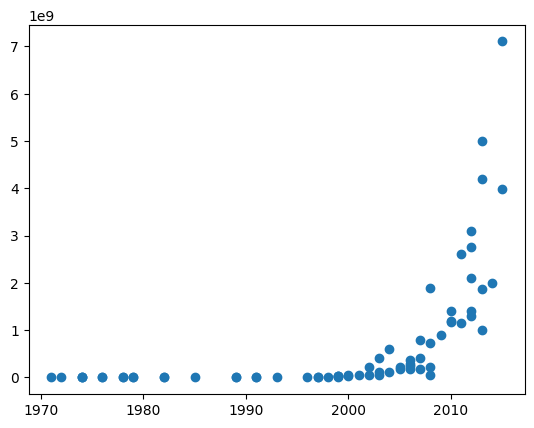

In [165]:
#Plot data
plt.scatter(X, Y);

In [167]:
Y = np.log(Y)

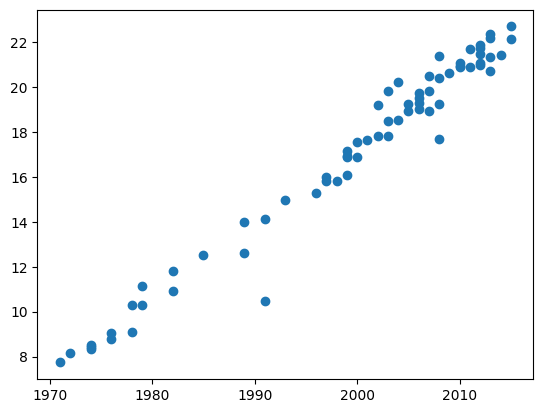

In [168]:
#Plot data after linearization
plt.scatter(X, Y)

In [170]:
X = X - X.mean()

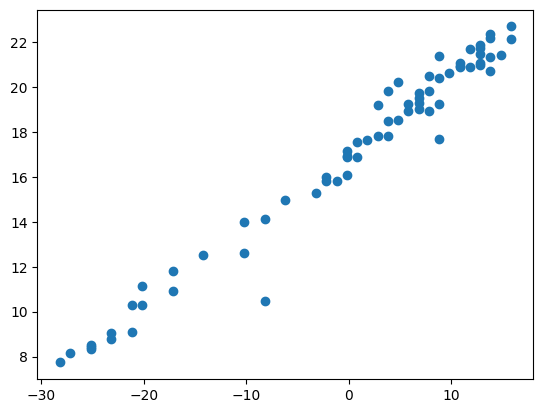

In [171]:
#Plot after fixing X scale for regression
plt.scatter(X, Y)

In [172]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1, )),
    tf.keras.layers.Dense(1),
])

In [173]:
model.compile(
    optimizer=tf.keras.optimizers.SGD(0.001, 0.9),
    loss='mse',
)

In [174]:
def schedule(epoch, learning_rate):
  if epoch >= 50:
    return 0.0001
  return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

In [175]:
# Train the model
r = model.fit(X, Y, epochs=200, callbacks=[scheduler])

Epoch 1/200
3/3 [==============================] - 0s 8ms/step - loss: 333.2617 - lr: 0.0010
Epoch 2/200
3/3 [==============================] - 0s 4ms/step - loss: 287.1940 - lr: 0.0010
Epoch 3/200
3/3 [==============================] - 0s 4ms/step - loss: 275.0366 - lr: 0.0010
Epoch 4/200
3/3 [==============================] - 0s 4ms/step - loss: 263.1059 - lr: 0.0010
Epoch 5/200
3/3 [==============================] - 0s 4ms/step - loss: 234.4053 - lr: 0.0010
Epoch 6/200
3/3 [==============================] - 0s 5ms/step - loss: 206.8033 - lr: 0.0010
Epoch 7/200
3/3 [==============================] - 0s 4ms/step - loss: 196.3436 - lr: 0.0010
Epoch 8/200
3/3 [==============================] - 0s 6ms/step - loss: 160.2680 - lr: 0.0010
Epoch 9/200
3/3 [==============================] - 0s 4ms/step - loss: 184.5978 - lr: 0.0010
Epoch 10/200
3/3 [==============================] - 0s 9ms/step - loss: 132.2938 - lr: 0.0010
Epoch 11/200
3/3 [==============================] - 0s 5ms/step - los

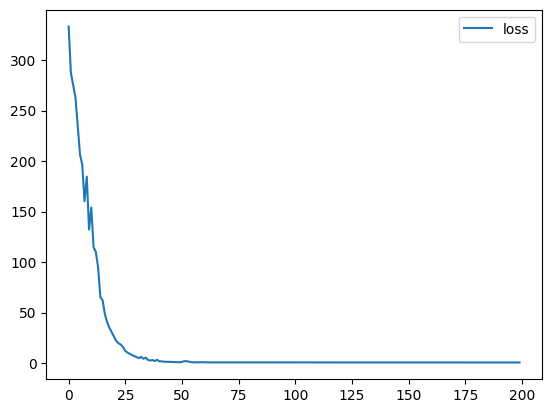

In [176]:
# Plot the loss
plt.plot(r.history['loss'], label='loss');
plt.legend();

In [177]:
model.layers

In [178]:
model.layers[0].get_weights()

[array([[0.33703768]], dtype=float32), array([16.835257], dtype=float32)]

In [179]:
a = model.layers[0].get_weights()[0][0,0]

In [188]:
import math
math.log(2)/0.337


2.05681655952506